In [1]:
import os
import keras_ocr
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
import numpy as np

2024-10-01 08:03:18.505918: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-01 08:03:18.644238: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# Укажите директорию с данными и моделями
data_dir = 'text'

# Загрузка обученного детектора
detector_model_path = os.path.join(data_dir, 'detector_2024-10-01T01:39:12.577950.h5')
detector = keras_ocr.detection.Detector(weights='clovaai_general')

# Загрузка обученного распознавателя
recognizer_model_path = os.path.join(data_dir, 'recognizer_2024-10-01T05:17:47.275263.h5')

# Якутский алфавит
alphabet = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюяҕҥөһү '
recognizer_alphabet = ''.join(sorted(set(alphabet.lower())))

recognizer = keras_ocr.recognition.Recognizer(
    alphabet=recognizer_alphabet,
    weights='kurapan'
)
recognizer.model.load_weights(recognizer_model_path)

Looking for /root/.keras-ocr/craft_mlt_25k.h5


2024-10-01 08:03:20.955642: E tensorflow/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-10-01 08:03:20.955700: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: e24d1dc5ca34
2024-10-01 08:03:20.955712: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: e24d1dc5ca34
2024-10-01 08:03:20.955848: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: NOT_FOUND: was unable to find libcuda.so DSO loaded into this program
2024-10-01 08:03:20.955882: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 535.104.12
2024-10-01 08:03:20.956110: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in

Provided alphabet does not match pretrained alphabet. Using backbone weights only.
Looking for /root/.keras-ocr/crnn_kurapan_notop.h5


In [9]:
# Чтение первых 10 предложений из файла
wordlist_file = os.path.join(data_dir, 'sah.training_text')
with open(wordlist_file, 'r', encoding='utf-8') as f:
    sentences = [line.strip() for line in f if line.strip()][:10]

print("Первые 10 предложений:")
for i, sentence in enumerate(sentences, 1):
    print(f"{i}. {sentence}")

Первые 10 предложений:
1. Сыһыат туохтуур Сыһыат туохтуур () — саҥа ирээтэ, сүрүн дьайыыны быһаарар хаттыгас дьайыы.
2. "Тугу гынаары? Хайаары?" диэн ыйытыыга хоруйдуур. Сүрүн хайааһыҥҥа хосуһар, ойоҕос
3. хайааһыны көрдөрөр туохтуур туттуллук халыыба сыһыат туохтуур дэнэр. Атын түүр тылларыгар
4. сыһыат туохтуур букатын уларыйбат халыыбынан ааҕыллар буоллаҕына, саха тылыгар сыһыат
5. туохтуур балачча уларыйар курдук өйдөнөр. Сорохторго кэпсиирэ сыһыарыытын холбонон, сирэй
6. халыыптарынан уларыйаллар. Сыһыат туохтуур, тус туохтуур курдук, оҥоһуллар хайааһыны
7. саҥарар түгэҥҥэ тэҥнээн (кини иннинэ, кэмигэр эбэтэр кэнниттэн) буоларын көрдөрбөт. Кини
8. сүрүн туохтуур кэмин иннигэр,кэмигэр эбэтэр кэннигэр буолар хосуһар хайааһын оҥоһуллар
9. кэмин (тааксыһы) көрдөрөр. Саха тылыгар маннык сыһыат туохтуурдар бааллар:
10. 1)-ан,2)-а,-ы,3)-ымына, 4)-баакка, 5)-аары, 6)-ымаары, 7)-аат,8)-бытынан уонна 9)-бычча.


In [14]:
# Параметры изображения
img_height = 150 * len(sentences)  # Увеличиваем пространство между строками
img_width = 1600
font_path = 'text/fonts/Bitter/Bitter-VariableFont_wght.ttf'
font_size = 32

In [15]:
img = Image.new('RGB', (img_width, img_height), color='white')
draw = ImageDraw.Draw(img)
font = ImageFont.truetype(font_path, font_size)

y_offset = 50  # Начальное смещение для первой строки
spacing = 150  # Пространство между строками

for sentence in sentences:
    bbox = draw.textbbox((0, 0), sentence, font=font)
    text_width = bbox[2] - bbox[0]
    position = ((img_width - text_width) / 2, y_offset)
    draw.text(position, sentence, fill='black', font=font)
    y_offset += spacing

# Преобразование изображения для использования в keras-ocr
img_array = np.array(img)

In [16]:
# Распознавание текста
pipeline = keras_ocr.pipeline.Pipeline(detector=detector, recognizer=recognizer)
prediction_groups = pipeline.recognize([img_array])
predictions = prediction_groups[0]

4/4 [==============================] - 2s 385ms/step



Actual Text:
Сыһыат туохтуур Сыһыат туохтуур () — саҥа ирээтэ, сүрүн дьайыыны быһаарар хаттыгас дьайыы.
"Тугу гынаары? Хайаары?" диэн ыйытыыга хоруйдуур. Сүрүн хайааһыҥҥа хосуһар, ойоҕос
хайааһыны көрдөрөр туохтуур туттуллук халыыба сыһыат туохтуур дэнэр. Атын түүр тылларыгар
сыһыат туохтуур букатын уларыйбат халыыбынан ааҕыллар буоллаҕына, саха тылыгар сыһыат
туохтуур балачча уларыйар курдук өйдөнөр. Сорохторго кэпсиирэ сыһыарыытын холбонон, сирэй
халыыптарынан уларыйаллар. Сыһыат туохтуур, тус туохтуур курдук, оҥоһуллар хайааһыны
саҥарар түгэҥҥэ тэҥнээн (кини иннинэ, кэмигэр эбэтэр кэнниттэн) буоларын көрдөрбөт. Кини
сүрүн туохтуур кэмин иннигэр,кэмигэр эбэтэр кэннигэр буолар хосуһар хайааһын оҥоһуллар
кэмин (тааксыһы) көрдөрөр. Саха тылыгар маннык сыһыат туохтуурдар бааллар:
1)-ан,2)-а,-ы,3)-ымына, 4)-баакка, 5)-аары, 6)-ымаары, 7)-аат,8)-бытынан уонна 9)-бычча.

Predicted Text:
['ыьыя', 'оыья', 'бдьарар', 'дды', 'ды', 'шты', 'штр', 'ы', 'шьы', 'н', 'шы', 'н', 'ты', 'ьйбврьы', 'йьь

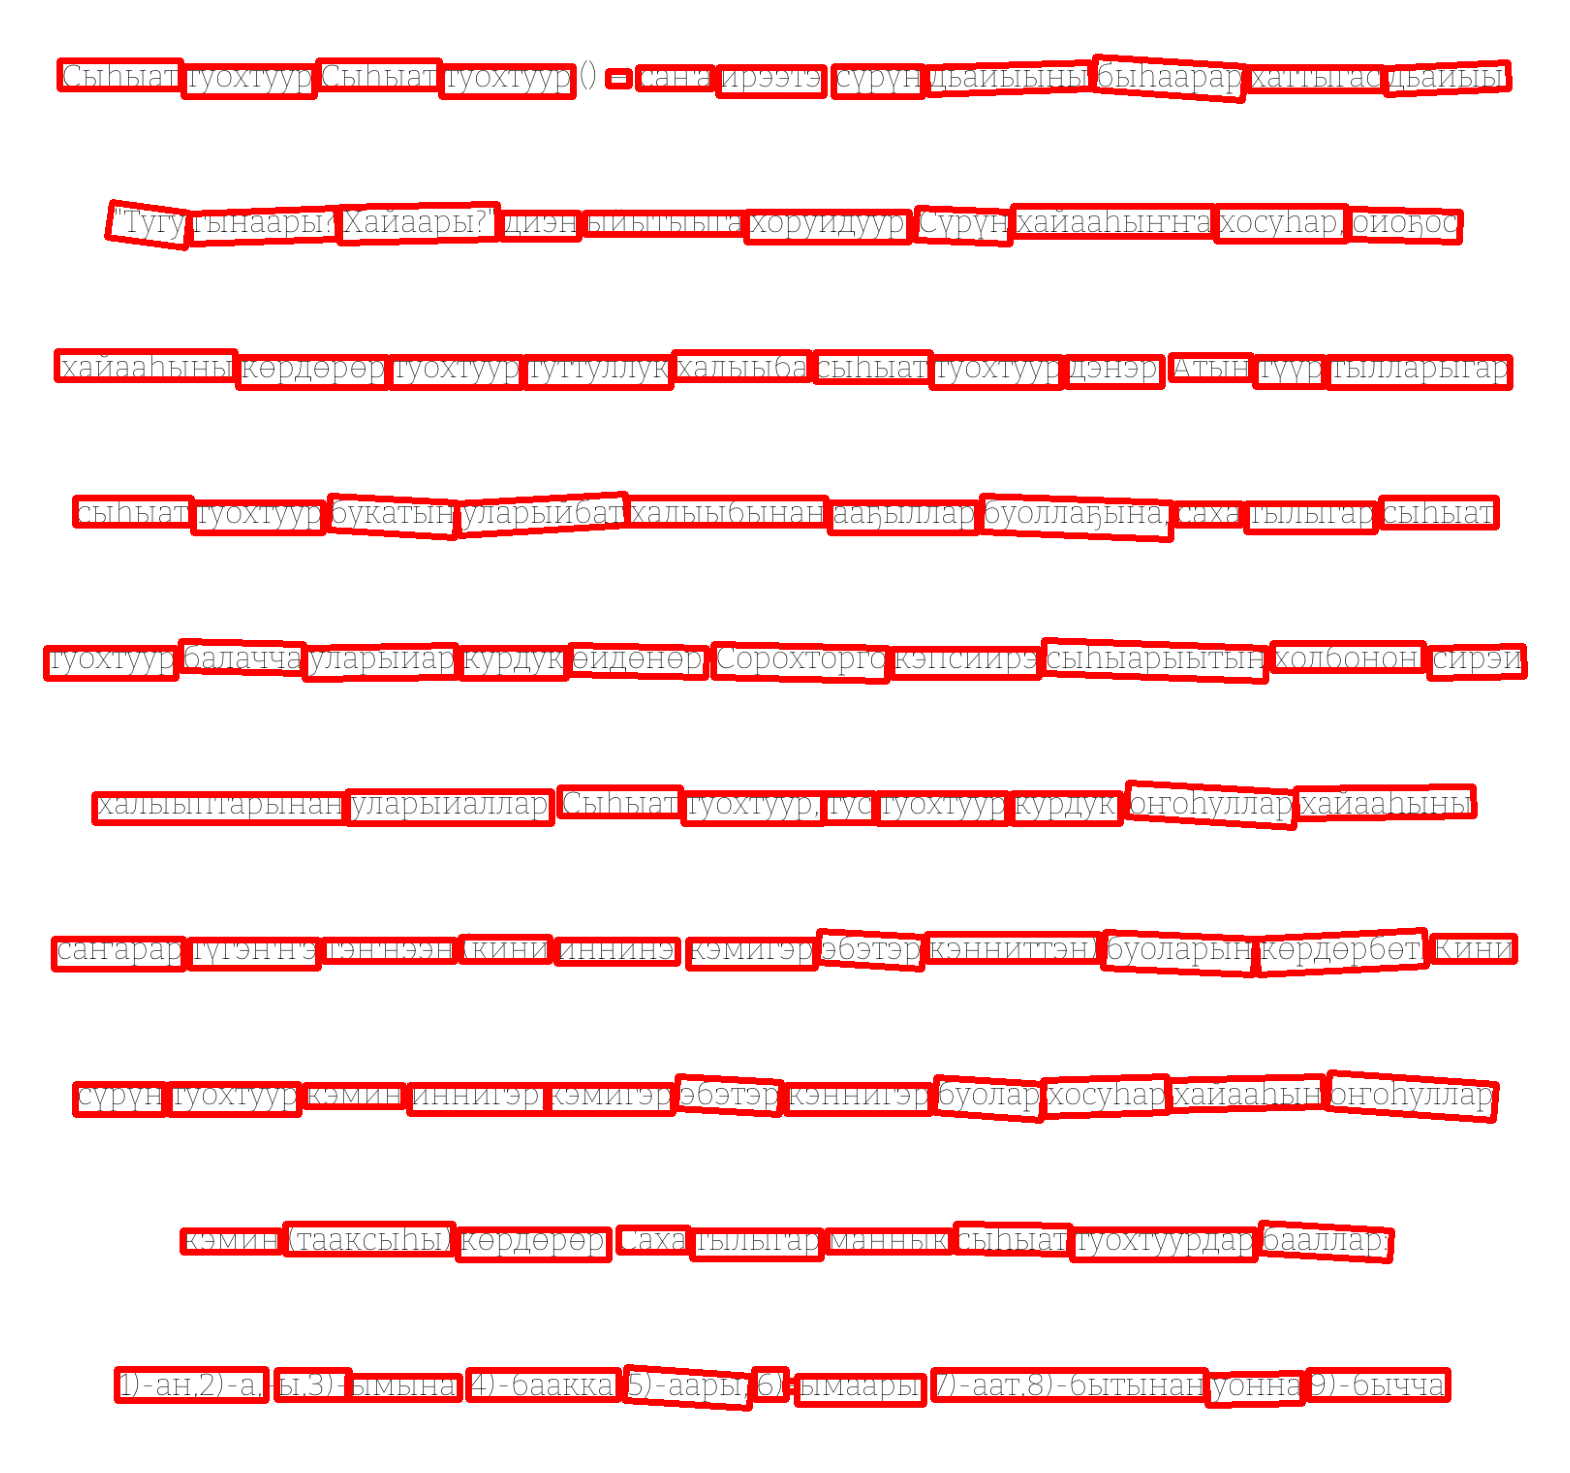

In [17]:
drawn = keras_ocr.tools.drawBoxes(
    image=img_array, boxes=predictions, boxes_format='predictions'
)

# Print actual and predicted texts
print('\nActual Text:')
print('\n'.join(sentences))
print('\nPredicted Text:')
print([text for text, box in predictions])

plt.figure(figsize=(20, 20))  # Increase output size
plt.imshow(drawn)
plt.axis('off')
plt.show()